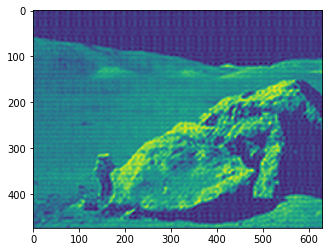

In [21]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt


img = plt.imread("http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/moonlanding.png")
img_ft = fftpack.fft2(img, axes=(0, 1))
keep_fraction = 0.1

img_ft2 = img_ft.copy()
r, c = img_ft2.shape
img_ft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
img_ft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
img_new = fftpack.ifft2(img_ft2).real

plt.imshow(img_new)
plt.show()

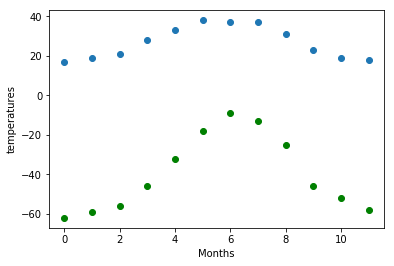

In [22]:
from scipy import optimize

def f(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))


temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = np.arange(12)
plt.plot(months, temp_max, 'o')
plt.plot(months, temp_min, 'go')
plt.xlabel('Months')
plt.ylabel('temperatures')
res_max, cov_max = optimize.curve_fit(f, months, temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(f, months, temp_min, [-40, 20, 0])
days = np.linspace(0, 12, num=365)

plt.show()

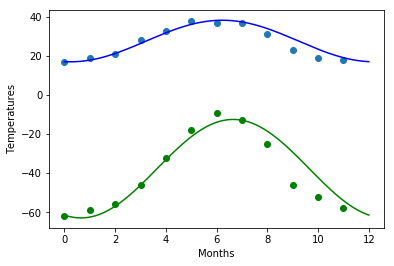

In [23]:
plt.plot(months, temp_max, 'o')
plt.plot(days, f(days, *res_max), 'b-')
plt.plot(months, temp_min, 'go')
plt.plot(days, f(days, *res_min), 'g-')
plt.xlabel('Months')
plt.ylabel('Temperatures')

plt.show()

In [24]:
from mpl_toolkits.mplot3d import Axes3D
def sixhump(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + 4*x[1]**2) * x[1] **2

x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)
xmin = optimize.fmin_bfgs(sixhump, (0, 0) )

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 4
         Gradient evaluations: 1


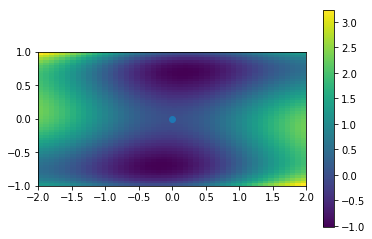

In [25]:
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()
plt.scatter(xmin[0], xmin[1])
plt.show()

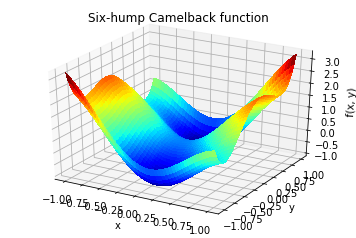

In [26]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(xg,yg,sixhump([xg,yg]),rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')
plt.show()

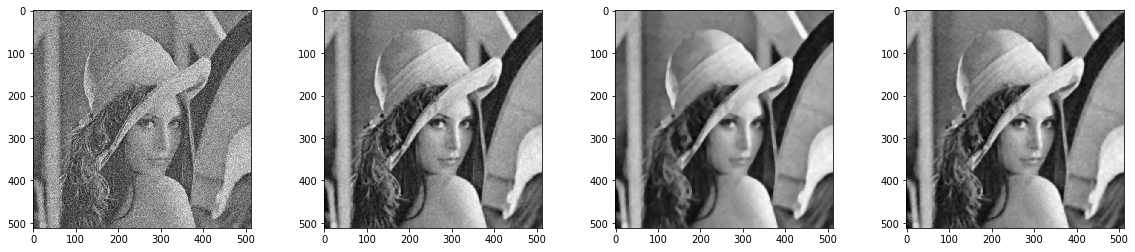

In [27]:
from scipy import misc
from scipy import signal
from scipy import ndimage
lena=plt.imread('http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/lena.png')
noisy_lena=np.copy(lena).astype(np.float)
noisy_lena+=lena.std()*0.5*np.random.standard_normal(lena.shape)
blurred_lena=ndimage.gaussian_filter(noisy_lena,sigma=1.5)
median_lena=ndimage.median_filter(blurred_lena,size=9)
wiener_lena=signal.wiener(blurred_lena,(5,5))

fig, gr=plt.subplots(1, 4, figsize=(20, 4))
gr[0].imshow(noisy_lena, cmap='gray')
gr[1].imshow(blurred_lena, cmap='gray')
gr[2].imshow(median_lena, cmap='gray')
gr[3].imshow(wiener_lena, cmap='gray')
plt.show()

In [28]:
A = np.zeros((7,7), dtype=np.int)
A[1:5, 1:5] = 1; 
A[5, 5] = 1; 
A[0,0]=1
print(ndimage.binary_opening(A).astype(np.int))
B=ndimage.binary_erosion(A).astype(A.dtype)
B=ndimage.binary_dilation(B).astype(A.dtype)
print(B)

[[0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 1 1 1 1 0 0]
 [0 1 1 1 1 0 0]
 [0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 1 1 1 1 0 0]
 [0 1 1 1 1 0 0]
 [0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [29]:
from scipy import misc
from scipy import ndimage
from scipy import signal

A = np.zeros((50, 50))
A[10:-10, 10:-10] = 1
A += 0.25*np.random.standard_normal(A.shape)
Mask = A >= 0.5
OpenMask = ndimage.binary_opening(Mask)
CloseMask = ndimage.binary_closing(OpenMask)
InitialArea=30*30
InitialArea-np.sum(CloseMask)

8